<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/08EDO_sistema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El meta-Xyleno se produce en un reactor de flujo de pistón a $1500R$ y $35atm$ a partir de Mesitileno. Ocurren dos reacciones en éste reactor

$$
Mesitileno (M) + Hidrógeno (H) \stackrel{k_1}{\longrightarrow}  Meta-Xyleno (X) + Metano\\
Meta-Xyleno (X) + Hidrógeno (H) \stackrel{k_2}{\longrightarrow}  Tolueno (T) + Metano
$$

La segunda reacción no es deseable porque convierte el meta-Xyleno a Tolueno. El siguiente sistema se obtiene del balance

$$
\frac{dC_H}{dt}=-k_1C_H^{0.5}C_M-k_2C_H^{0.5}C_X\\
\frac{dC_M}{dt}=-k_1C_H^{0.5}C_M\\
\frac{dC_X}{dt}=k_1C_H^{0.5}C_M-k_2C_H^{0.5}C_X
$$

Donde $k_1$ es la constante de la reacción 1, $k_2$ es la constante de la reacción 2, $C_H$,$C_M$ y
$C_X$ son las concentraciones de hidrógeno, mesitileno y meta-Xyleno en un $t$ específico en el
reactor. Las concentraciones de hidrógeno y mesitileno en la entrada del reactor son $0.021$ y
$0.0105$ $lbmol/ft^3$ y $k_1 = 55.2 ft^3/lbmol 0.5/hr$ $k_2 = 30.2 ft^3/lbmol 0.5/hr$.

Graficar la concentración de hidrógeno, mesitileno, meta-Xyleno como una función de $t$ de $0$ a $0.5 hr$.
Determine el $t$ óptimo en el reactor de flujo de pistón para obtener la máxima cantidad de producto.


In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Sistema de ecuaciones diferenciales
def f(C,t):
  k1 =55.2
  k2 =30.2
  #C [0] concentracion de Hidrogeno
  #C [1] concentracion de Mesitileno
  #C [2] concentracion de Meta - Xylen
  dch =-k1*C [0]**0.5* C[1] - k2*C [0]**0.5* C [2] # Hidrogeno
  dcm =-k1*C [0]**0.5* C [1] # Mesitileno
  dcx =k1*C [0]**0.5* C[1] - k2*C [0]**0.5* C [2] #Meta - Xylen
  return [dch ,dcm , dcx ]

In [ ]:
x0 =0 # valor inicial de tiempo
#y0 =[ Hidrogeno Mesitileno Meta - Xylen ]
y0 =[0.021 ,0.0105 ,0.] # condiciones iniciales de
x1 =0.5 # valor final del tiempo
tiempo =np.linspace (x0,x1)
# llamada a la funcion odeint
sol = odeint(f,y0,tiempo )
#sol

In [ ]:
pmax,idx = np.max(sol[:,2]),np.argmax(sol[:,2])
t=tiempo[idx]
print('tiempo =',t,'hr\nproducto maximo = ',pmax,'lbmol')

tiempo = 0.19387755102040816 hr
producto maximo =  0.005066442312888437 lbmol


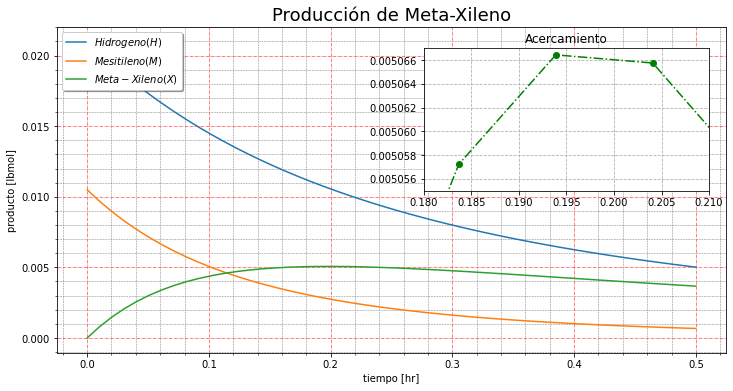

In [ ]:
fig,ax=plt.subplots(1,figsize=(12,6))
ax.minorticks_on()
plt.plot(tiempo,sol[:,0],label = '$Hidrogeno (H)$')
plt.plot(tiempo,sol[:,1],label = '$Mesitileno (M)$')
plt.plot(tiempo,sol[:,2],label = '$Meta - Xileno (X)$')
plt.legend(fancybox=True,shadow=True,loc='upper left')
plt.grid(which='major',linestyle='-.',linewidth=0.5,color='red')
plt.grid(which='minor',linestyle='--',linewidth=0.5,color='gray')
plt.title('Producción de Meta-Xileno',fontsize=18)
plt.xlabel('tiempo [hr]')
plt.ylabel('producto [lbmol]')

inner_ax = fig.add_axes([0.55, 0.5, 0.33, 0.33]) # x, y, width, height
inner_ax.plot(tiempo,sol[:,2],'o-.',color='green')
inner_ax.set(title='Acercamiento', xlim=(0.1800, 0.21),ylim=( 0.005055, 0.005067))
inner_ax.grid(linestyle='--')

plt.show()

#Atractor de Lorenz

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros a, b, c, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker en 2002.

El sistema de Lorenz es un conjunto de tres ecuaciones diferenciales ordinarias acopladas
que representan la conveccion de fluidos atmosfericos en tres dimensiones:

$$
\frac{dx}{dt}=a(y-x)\\
\frac{dy}{dt}=x(b-z)-y\\
\frac{dz}{dt}=xy-cz
$$

donde a es llamado el número de Prandtl y b se llama el número de Rayleigh y c es una constante de proporcionalidad. Con $(x,y,z) \in R$

a,b,c>0, pero es usualmente a=10, c=8/3 y b es variado. El sistema exhibe un comportamiento caótico para b=28 pero muestra órbitas periódicas para otros valores de b; para valores de b ≥ 28 el sistema es caotico.

El sistema de Lorenz tiene un importante desarrollo historico en la mecanica de fluidos atmosfericos, y sirve de paradigma para otros estudios aplicados a dinamicas caoticas.

La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del efecto mariposa en la teoría del caos.

In [ ]:
def f(X,t):
  x,y,z=X
  a=10
  b=28
  c=8/3
  dxdt=a*(y-x)
  dydt=x*(b-z)-y
  dzdt=x*y-c*z

  return np.array([dxdt,dydt,dzdt])

In [ ]:
tiempo=np.linspace(0,40,4000)
y0=[1.,1.,1.]
Y=odeint(f,y0,tiempo)
Y

In [ ]:
import plotly.express as px

fig = px.line_3d(x=Y[:,0], y=Y[:,1], z=Y[:,2])
fig.show()